In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=56)

In [4]:
# Fit a vanilla Logistic Regression classifier and make predictions
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

In [11]:
# Function to calculate True Positive Rate and False Positive Rate

def calc_TP_FP_rate(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_true[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    return tpr, fpr

# Test function

calc_TP_FP_rate(y_test, y_pred_test)

(0.6923076923076923, 0.1891891891891892)

In [12]:
# LOGISTIC REGRESSION (NO REGULARIZATION)

# Fit and predict test class probabilities
lr = LogisticRegression(max_iter=1000, penalty='none')
lr.fit(X_train, y_train)
y_test_probs = lr.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
lr_tp_rates = []
lr_fp_rates = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0,1,num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    tp_rate, fp_rate = calc_TP_FP_rate(y_test, y_test_preds)
        
    lr_tp_rates.append(tp_rate)
    lr_fp_rates.append(fp_rate)

In [13]:
# LOGISTIC REGRESSION (L2 REGULARIZATION)

# Fit and predict test class probabilities
lr_l2 = LogisticRegression(max_iter=1000, penalty='l2')
lr_l2.fit(X_train, y_train)
y_test_probs = lr_l2.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
l2_tp_rates = []
l2_fp_rates = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0,1,num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    tp_rate, fp_rate = calc_TP_FP_rate(y_test, y_test_preds)
        
    l2_tp_rates.append(tp_rate)
    l2_fp_rates.append(fp_rate)

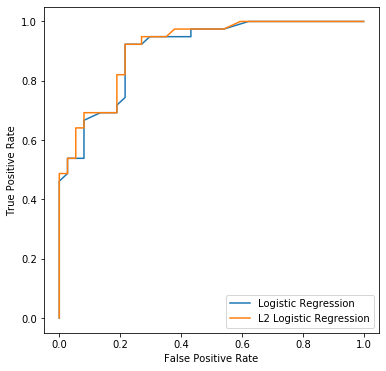

In [14]:
# Plot ROC curves

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(lr_fp_rates, lr_tp_rates, label='Logistic Regression')
ax.plot(l2_fp_rates, l2_tp_rates, label='L2 Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();

In [9]:
# Get AUC scores

from sklearn.metrics import auc

print(f'Logistic Regression (No reg.) AUC {auc(lr_fp_rates, lr_tp_rates)}')
print(f'Logistic Regression (L2 reg.) AUC {auc(l2_fp_rates, l2_tp_rates)}')

Logistic Regression (No reg.) AUC 0.902979902979903
Logistic Regression (L2 reg.) AUC 0.9116424116424116


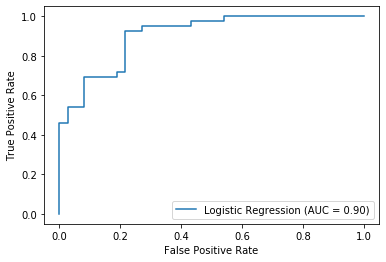

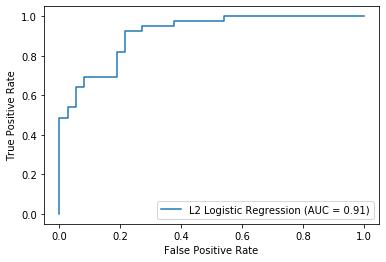

In [10]:
# Use sklearn to plot ROC curves

from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr, X_test, y_test, name = 'Logistic Regression')
plot_roc_curve(lr_l2, X_test, y_test, name = 'L2 Logistic Regression');